### Opis problemu
W procesie produkcji brzeczki na warzelni, filtr zacierny stanowi kluczowy element, który ma wpływ na jakość końcowego produktu. Jednakże, zaobserwowano pewne nieprawidłowości w funkcjonowaniu płyt filtra, co potencjalnie może prowadzić do niedokładności w procesie jego działania.
Podjęto próbę analizy procesu rozbierania/przesuwu płyt filtru zaciernego w celu wykrycia oraz rejestracji sytuacji, w której płyty nie dochodzą do siebie, co prowadzi do powstania niedopuszczalnych szpar między nimi.



In [ ]:
# Import bibltiotek
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Wczytaj obraz
raw = cv2.imread("mash_filter.jpg")

(1734, 2312, 3)


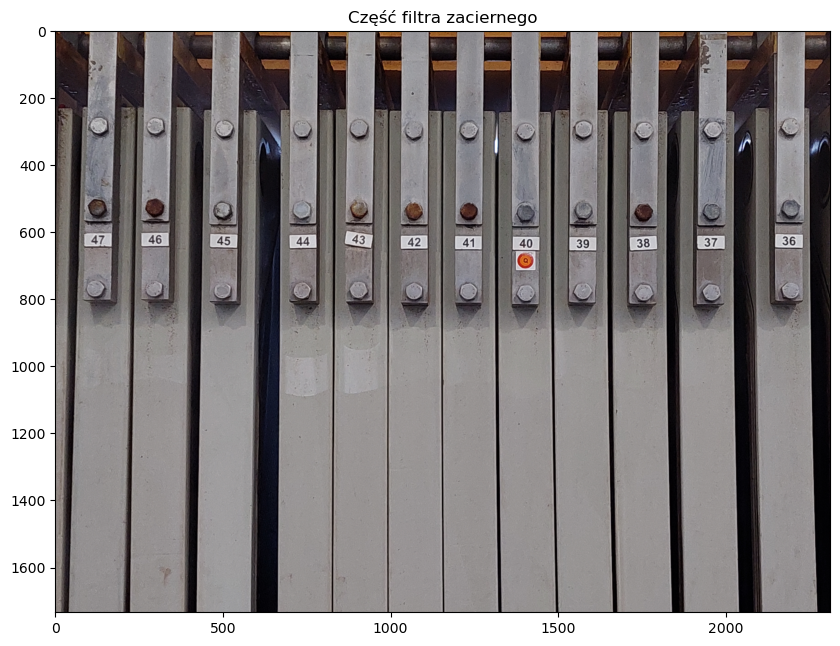

In [ ]:
# Skaluj obraz zmieniając wartość zmiennej scale
# % obrazu
scale = 50

# Zdefiniuj szerokość i wysokość
width = int(raw.shape[1] * scale / 100)
height = int(raw.shape[0] * scale / 100)

# Nowy rozmiar obrazu
size = (width, height)

# Zmień rozmiar obrazu
img = cv2.resize(raw, size)

# Konwertuj przestrzeń barw na RGB. Domyślnie
# biblioteka matplotlib używa innych ustawień kolorów
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Ustawi rozmiar figury
plt.figure(figsize=(10,8))
plt.title("Część filtra zaciernego")
plt.imshow(img)
print(img.shape)

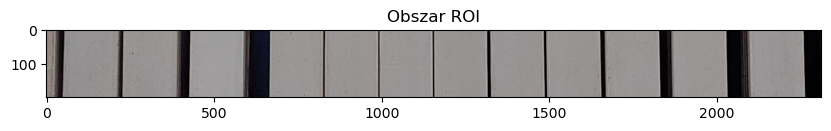

In [ ]:
# Wybierz obszar ROI do analizy
roi = img[1200:1400, 0:img.shape[1]]

plt.figure(figsize=(10,8))
plt.title("Obszar ROI")
plt.imshow(roi)

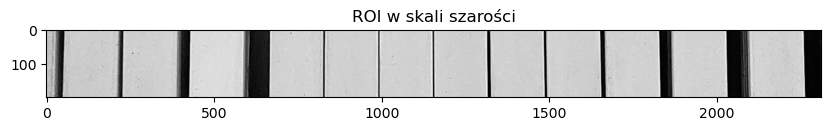

In [ ]:
# Konwertuj obszar ROI na skalę szarości
gray_roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,8))
plt.title("ROI w skali szarości")
plt.imshow(gray_roi, cmap="gray")

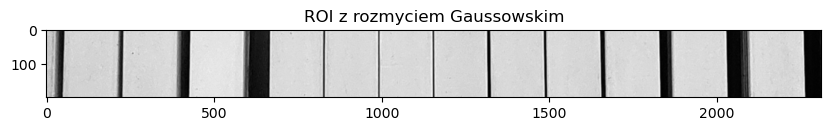

In [ ]:
# Zastosuj rozmycie Gaussa na obszarze ROI.
# Rozmycie Gaussowskie pozwala na redukcję szumów

# Ustaw wielkość jądra
kernel = (5,5)

blur_roi = cv2.GaussianBlur(gray_roi, kernel, 0)
plt.figure(figsize=(10,8))
plt.title("ROI z rozmyciem Gaussowskim")
plt.imshow(blur_roi, cmap="gray")

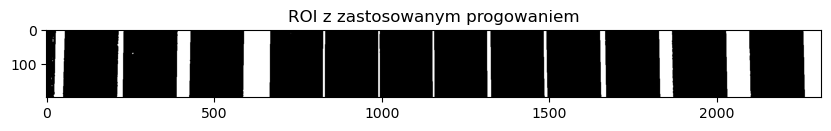

In [ ]:
# Zastosuj progowanie
# Operacja progowania konwertuje obraz w przesrzeń 0-1
# co w późniejszych etapach pozwala na redukcję szumów oraz
# dalszą łatwiejszą anazlię
_, thresh_roi = cv2.threshold(blur_roi, 110, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10,8))
plt.title("ROI z zastosowanym progowaniem")
plt.imshow(thresh_roi, cmap="gray")

In [ ]:
# Znajdowanie konturów na obrazie
contours, hierarchy = cv2.findContours(thresh_roi, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

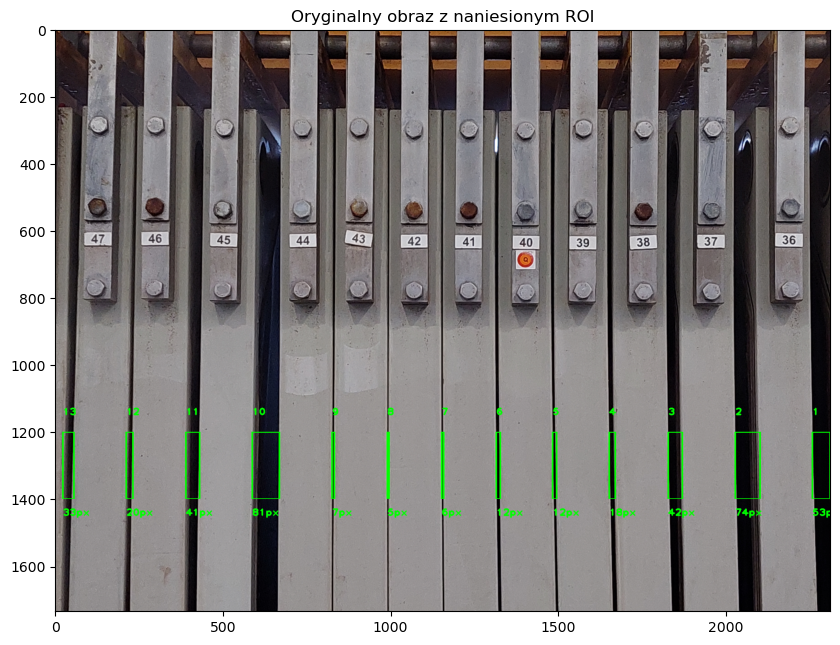

In [ ]:
cnt_szerokosc = []
cnt_szerokosc_id = []
cnt_id = 0

# Iteracja po konturach i rysowanie prostokątów
# na wykrytych krawędzich
for cnt in contours:

    # Oblicz pole powierzchni konturu
    area = cv2.contourArea(cnt)
    if area > 100:
        cnt_id += 1
        # Pobierz prostokąt otaczający kontur
        x, y, w, h = cv2.boundingRect(cnt)
        # Rysuj prostokąt
        cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 4)
        # dodaj do listy szerokosc konturu
        cnt_szerokosc.append(w)
        # Dodaj do listy id kazdego konturu
        cnt_szerokosc_id.append(cnt_id)
        # Wyświetl Id na obrazie
        cv2.putText(img, f"{cnt_id}", (x, h+950), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 4)
        # Wyświetl szerokości na obrazie
        cv2.putText(img, f"{w}px", (x, h+1250), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 4)

plt.figure(figsize=(10,8))
plt.title("Oryginalny obraz z naniesionym ROI")
plt.imshow(img)

In [ ]:
# Utworzów DataFrame
data = {"Id": cnt_szerokosc_id,
       "szerokosc": cnt_szerokosc}

df = pd.DataFrame(data=data)
df.head()

,Id,szerokosc
0,1,53
1,2,74
2,3,42
3,4,18
4,5,12


### Podsumowanie
Projekt ten mógłby stanowić początek inicjatywy tworzenia systemu monitorującego, który w ostatecznym efekcie umożliwiłby identyfikację wadliwych płyt, przyczyniając się do szybszej reakcji na potencjalne problemy w przyszłości.